### Defining a Graph 

What is a graph?

**A graph G = (V, E) consists of a set of vertices V together with a set E of vertex pairs or edges.**

- Directed, vs a tree(from dsa at iit)
![](http://lcm.csa.iisc.ernet.in/dsa/img383.gif)

- Undirected: if edge x -> y is in graph, so is y->x

![](http://i.stack.imgur.com/YA7NX.png)

- An acyclic graph does not contain any cycles.

- With weights: each edge is assigned a weight

![](http://images.books24x7.com/bookimages/id_12903/fig413_01.jpg)

- DAG, with topologocal ordering: these arise naturally in scheduling problems

![](http://www.cs.cornell.edu/courses/cs3110/2009sp/lectures/images/graph-ordering.png)

- Trees are connected, acyclic, undirected graphs.

In [1]:
from IPython.display import Image
import subprocess
def plotdgraph(g, fname):
    start="""
    digraph G {
    nodesep=0.9;
    ranksep=0.6;
    margin=0.1;
    rankdir=LR;
    node [shape=circle];
    edge [arrowsize=0.8];
    """
    end = "}"
    lines=""
    labeldict={}
    for f in g:
        for t in f.connections:
            lines = lines + "\"{}\" -> \"{}\";\n".format(f.idee,t.idee)
    end="\n"+end
    start = start + lines +end
    with open(fname+".dot","w") as fd:
        fd.write(start)
    subprocess.call(['./graphplot.sh', fname])
    return Image(fname+".png")

In [2]:
from IPython.display import Image
import subprocess
def plotugraph(g, fname):
    start="""
    graph G {
    nodesep=0.9;
    ranksep=0.6;
    sep=0.5;
    margin=0.1;
    rankdir=LR;
    node [shape=circle];
    edge [arrowsize=10];
    """
    end = "}"
    lines=""
    labeldict={}
    for f in g:
        for t in f.connections:
            if not "{}-{}".format(f.idee, t.idee) in labeldict:
                lines = lines + "\"{}\" -- \"{}\";\n".format(f.idee,t.idee)
                labeldict["{}-{}".format(f.idee, t.idee)]=True
                labeldict["{}-{}".format(t.idee, f.idee)]=True
            #if not "{}-{}".format(f.idee, t.idee) in labeldict:
            #    lines = lines + "\"{}\" -- \"{}\"[dir=none, style=dashed];\n".format(f.idee,t.idee)
    end="\n"+end
    start = start + lines +end
    with open(fname+".dot","w") as fd:
        fd.write(start)
    subprocess.call(['./graphplot.sh', fname])
    return Image(fname+".png")

In [3]:
from IPython.display import Image
import subprocess
def plotgraphtree(g, fname):
    start="""
    digraph G {
    nodesep=0.9;
    ranksep=0.6;
    margin=0.1;
    node [shape=circle];
    edge [arrowsize=0.8];
    """
    end = "}"
    lines=""
    labeldict={}
    for av in g:
        print(av, av.idee)
        if av.parent != None:
            lines = lines + "\"{}\" -> \"{}\";\n".format(av.parent.idee,av.idee)
            for x in av.connections:
                labeldict["{}-{}".format(av.idee, x.idee)]=True
                if not "{}-{}".format(x.idee, av.idee) in labeldict:
                    lines = lines + "\"{}\" -> \"{}\"[dir=none, style=dashed];\n".format(av.idee,x.idee)

    end="\n"+end
    start = start + lines +end
    with open(fname+".dot","w") as fd:
        fd.write(start)
    subprocess.call(['./graphplot.sh', fname])
    return Image(fname+".png")

### Representations

1. **Adjacency Matrix**: We can represent G using an n x n matrix M, where element M[i,j] = 1 if (i,j) is an edge of G, and 0 if it isn't. Fast for membership of edges, and for edge insertion and deletion. Space hungry.
2. **Adjacency Lists**: sparse graphs can be represented by using lists/linked lists to store the neighbors adjacent to each vertex. 
3. **list of edges**:edge lists are linear in the size of the graph (edges plus vertices), just like adjacency lists.

![](http://staff.ustc.edu.cn/~csli/graduate/algorithms/book6/466_b.gif)

### Adjacency List representation

In [4]:
class Vertex:
    def __init__(self,key):
        self._idee = key
        self._clist = []

    def addNeighbor(self,nbr):
        self._clist.append(nbr)

    def __repr__(self):
        return self.__class__.__name__+"("+ str(self._idee) + \
            ' -> ' + str([x._idee for x in self._clist])+")"

    @property
    def connections(self):
        return self._clist

    @property
    def idee(self):
        return self._idee

In [5]:
class Graph:
    def __init__(self, directed=False, vclass = Vertex):
        self._vertlist = {}
        self._n = 0
        self._directed=directed
        self._vclass=vclass

    def addVertex(self,key):
        self._n += 1
        nv = self._vclass(key)
        self._vertlist[key]=nv
        return nv
    
    def __len__(self):
        return self._n

    def getVertex(self,vkey):
        if vkey in self._vertlist:
            return self._vertlist[vkey]
        else:
            return None

    def __contains__(self,vkey):
        return vkey in self._vertlist

    def addEdge(self,f,t):
        if f not in self._vertlist:
            fv = self.addVertex(f)
        if t not in self._vertlist:
            tv = self.addVertex(t)
        self._vertlist[f].addNeighbor(self._vertlist[t])
        if not self._directed:
            self._vertlist[t].addNeighbor(self._vertlist[f])

    @property
    def directed(self):
        return self._directed
        
    def __iter__(self):
        return iter(self._vertlist.values())
    
    def connections(self, vkey):
        v = self._vertlist[vkey]
        return v.connections

### Graphs everywhere

- scheduling
- social networks
- mazes: what's a vertex and what's an edge?
- moves in the Rubiks cube (this turns into an algorithm called **connected components**: is the graph of legal configurations is connected?

### Our first undirected graph

In [6]:
g = Graph()
for i in range(1,7):
    g.addVertex(i)
list(g)

[Vertex(1 -> []),
 Vertex(2 -> []),
 Vertex(3 -> []),
 Vertex(4 -> []),
 Vertex(5 -> []),
 Vertex(6 -> [])]

In [102]:
g.addEdge(1,6)
g.addEdge(1,2)
g.addEdge(2,3)
g.addEdge(3,4)
g.addEdge(4,5)
g.addEdge(2,5)
g.addEdge(5,1)

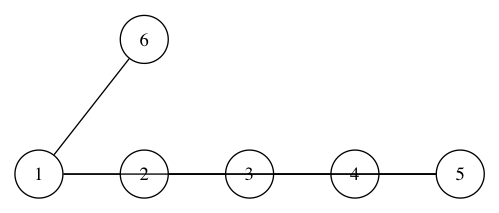

In [103]:
plotugraph(g,"small")

In [16]:
list(g)

[Vertex(1 -> [6, 2, 5]),
 Vertex(2 -> [1, 3, 5]),
 Vertex(3 -> [2, 4]),
 Vertex(4 -> [3, 5]),
 Vertex(5 -> [4, 2, 1]),
 Vertex(6 -> [1])]

### The general idea of graph traversal

- There are three states a vertex can be in **initial**, **discovered**, and **processed**.
- initially, only thestart vertex is considered to be discovered. 
- evaluate each edge leaving this start vertex.
- if edge goes to an undoscovered vertex v, mark it discovered. This means that it is a vertex we have to work on.
- ignore edges going to a processed vertex, or discovered but not processed, as these will come up in the list of nodes to process from some node
- we can go depth-first or breadth-first.
- Each undirected edge will be considered exactly twice, once when each of its endpoints is explored. 
- Directed edges will be considered only once, when exploring the source vertex. 


In [7]:
class AnnotatedVertex(Vertex):
    
    def __init__(self, key):
        super().__init__(key)
        self._parent = None
        self._annotation = None
        self.entry=0
        self.exit=0

    @property
    def parent(self):
        return self._parent
    @parent.setter
    def parent(self, v):
        self._parent = v
    @property
    def status(self):
        return self._annotation
    
    @property
    def discovered(self):
        return self._annotation=='d'
    
    @property
    def processed(self):
        return self._annotation=='p'
        
    def __repr__(self):
        if self.parent==None:
            self.parentid='null'
        else:
            self.parentid = self.parent._idee
        return self.__class__.__name__+"("+ str(self._idee) + \
            ' -> ' + str([x._idee for x in self._clist])+", time=("+\
                str(self.entry)+", "+str(self.exit)+"), parent="+str(self.parentid)+")"

    def set_status(self, **kwargs):
        if 'discovered' in kwargs and kwargs['discovered']==True:
            self._annotation='d'
        elif 'processed' in kwargs and kwargs['processed']==True:
            self._annotation='p'
        else:
            self._annotation=None
    

In [8]:
g = Graph(vclass=AnnotatedVertex)
for i in range(1,7):
    g.addVertex(i)
g.addEdge(1,6)
g.addEdge(1,2)
g.addEdge(2,3)
g.addEdge(3,4)
g.addEdge(4,5)
g.addEdge(2,5)
g.addEdge(5,1)
list(g)

[AnnotatedVertex(1 -> [6, 2, 5], time=(0, 0), parent=null),
 AnnotatedVertex(2 -> [1, 3, 5], time=(0, 0), parent=null),
 AnnotatedVertex(3 -> [2, 4], time=(0, 0), parent=null),
 AnnotatedVertex(4 -> [3, 5], time=(0, 0), parent=null),
 AnnotatedVertex(5 -> [4, 2, 1], time=(0, 0), parent=null),
 AnnotatedVertex(6 -> [1], time=(0, 0), parent=null)]

In [11]:
g.getVertex(2)

AnnotatedVertex(2 -> [1, 3, 5], time=(0, 0), parent=null)

In [12]:
g.getVertex(6).status

### Breadth First Search

(try implementing this yourself)

- assign a direction to each edge, starung from a start point.
- go breadth first at all the children of the start and make the start the parent.
- repeat at the children. This defines a tree on the vertices of the graph.
- the tree gives us a shortest path from start to every other node in the tree. 
- we find the path from an x to the start, following parent pointers.

### Depth First Search

The difference between BFS and DFS results is how they explore vertices. 

- Queue: BFS
- Stack or recursive: DFS

The stack is implicit in our recursive implementation below.

There is a notion of traversal time for each vertex: this tells us how many descendants a node has in the tree and the order in which they were processed in the DFS algorithm. Half the time difference tells us the number of descendants. This clock is used in many algorithms.


In [16]:
class DepthFirstSearch():
    
    def post_hook(self, v):
        print('after for', v.idee)
        print("Setting {} to processed".format(v.idee))
        
    def edge_hook(self, start, v):
        print('|', start.idee, start.status,'->',v.idee, v.status)
        if v.parent is start:
            print(start.idee,">", v.idee)
        elif (not v.processed and start.parent is not v):
            print('non-tree edge', v.processed)
        else:
            print("backward edge", v.processed)
    def pre_hook(self, v):
        print("start is", v.idee)

    def __init__(self, graph):
        self.time = 0
        self.g = graph
        self.vpre = self.pre_hook 
        self.vpost = self.post_hook
        self.process_edge = self.edge_hook
        self.finished = False
        
    def setPreVertex(self, hook):
        hook.__get__(self, self.__class_)
        self.vpre=hook
        
    def setPostVertex(self, hook):
        self.vpost=hook
        
    def setEdgeProcessor(self, hook):
        self.process_edge=hook
        
    def __call__(self, start):
        if self.finished:
            return None
        start.set_status(discovered=True)
        self.time += 1
        start.entry=self.time
        self.vpre(start)#run pre hook
        for v in start.connections:
            if not (v.discovered or v.processed):
                v.parent = start
                self.process_edge(start, v)#run edge hook
                self(v)
            elif (not v.processed and start.parent is not v) or g.directed:
                self.process_edge(start, v)
            else:
                self.process_edge(start, v)
            if self.finished:
                return None
        
        self.vpost(start)#run post hook
        self.time += 1
        start.exit=self.time
        start.set_status(processed=True)

#### DFS for our undirected graph

In [17]:
g = Graph(vclass=AnnotatedVertex)
for i in range(1,7):
    g.addVertex(i)
g.addEdge(1,6)
g.addEdge(1,2)
g.addEdge(2,3)
g.addEdge(3,4)
g.addEdge(4,5)
g.addEdge(2,5)
g.addEdge(5,1)
print(list(g))

[AnnotatedVertex(1 -> [6, 2, 5], time=(0, 0), parent=null), AnnotatedVertex(2 -> [1, 3, 5], time=(0, 0), parent=null), AnnotatedVertex(3 -> [2, 4], time=(0, 0), parent=null), AnnotatedVertex(4 -> [3, 5], time=(0, 0), parent=null), AnnotatedVertex(5 -> [4, 2, 1], time=(0, 0), parent=null), AnnotatedVertex(6 -> [1], time=(0, 0), parent=null)]


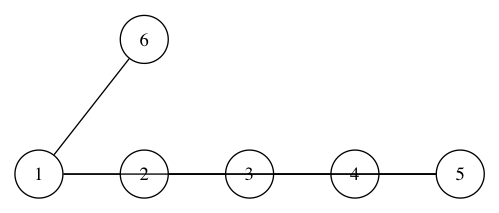

In [18]:
plotugraph(g, "smallagain")

In [19]:
dfs=DepthFirstSearch(g)
dfs(g.getVertex(1))

start is 1
| 1 d -> 6 None
1 > 6
start is 6
| 6 d -> 1 d
backward edge False
after for 6
Setting 6 to processed
| 1 d -> 2 None
1 > 2
start is 2
| 2 d -> 1 d
backward edge False
| 2 d -> 3 None
2 > 3
start is 3
| 3 d -> 2 d
backward edge False
| 3 d -> 4 None
3 > 4
start is 4
| 4 d -> 3 d
backward edge False
| 4 d -> 5 None
4 > 5
start is 5
| 5 d -> 4 d
backward edge False
| 5 d -> 2 d
non-tree edge False
| 5 d -> 1 d
non-tree edge False
after for 5
Setting 5 to processed
after for 4
Setting 4 to processed
after for 3
Setting 3 to processed
| 2 d -> 5 p
backward edge True
after for 2
Setting 2 to processed
| 1 d -> 5 p
backward edge True
after for 1
Setting 1 to processed


In [20]:
list(g)

[AnnotatedVertex(1 -> [6, 2, 5], time=(1, 12), parent=null),
 AnnotatedVertex(2 -> [1, 3, 5], time=(4, 11), parent=1),
 AnnotatedVertex(3 -> [2, 4], time=(5, 10), parent=2),
 AnnotatedVertex(4 -> [3, 5], time=(6, 9), parent=3),
 AnnotatedVertex(5 -> [4, 2, 1], time=(7, 8), parent=4),
 AnnotatedVertex(6 -> [1], time=(2, 3), parent=1)]

AnnotatedVertex(1 -> [6, 2, 5], time=(1, 12), parent=null) 1
AnnotatedVertex(2 -> [1, 3, 5], time=(4, 11), parent=1) 2
AnnotatedVertex(3 -> [2, 4], time=(5, 10), parent=2) 3
AnnotatedVertex(4 -> [3, 5], time=(6, 9), parent=3) 4
AnnotatedVertex(5 -> [4, 2, 1], time=(7, 8), parent=4) 5
AnnotatedVertex(6 -> [1], time=(2, 3), parent=1) 6


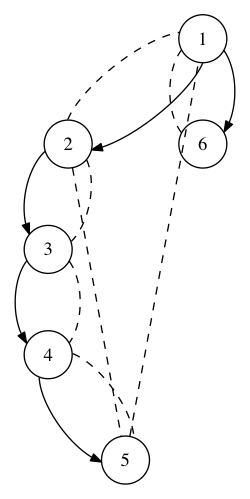

In [21]:
plotgraphtree(g, "smalltree")

### Cycles

If there is no back edge like 5-> 1 above, all edges are tree edges, and no cycle exists in a tree. Then, say you started at `x`:

`y.discovered and x.parent !=y` implies cycle (since you got to x from y)

In [22]:
def find_path(f, t):#maybe should be in graph class
    if t is not None:
        find_path(f, t.parent)
        print(t.idee)

In [23]:
class CycleFindingDFS(DepthFirstSearch):
    
    def pre_hook(self, v):
        pass
    
    def post_hook(self, v):
        pass
    
    def edge_hook(self, f, t):
        if t.discovered and f.parent is not t:
            print("Found cycle from {} to {}".format(f.idee, t.idee))
            print("Start at {}".format(f.idee))
            find_path(f,t)
            self.finished=True

In [24]:
g = Graph(vclass=AnnotatedVertex)
for i in range(1,7):
    g.addVertex(i)
g.addEdge(1,6)
g.addEdge(1,2)
g.addEdge(2,3)
g.addEdge(3,4)
g.addEdge(4,5)
g.addEdge(2,5)
g.addEdge(5,1)
dfs2 = CycleFindingDFS(g)

In [25]:
dfs2(g.getVertex(1))

Found cycle from 5 to 2
Start at 5
1
2


AnnotatedVertex(1 -> [6, 2, 5], time=(1, 0), parent=null) 1
AnnotatedVertex(2 -> [1, 3, 5], time=(4, 0), parent=1) 2
AnnotatedVertex(3 -> [2, 4], time=(5, 0), parent=2) 3
AnnotatedVertex(4 -> [3, 5], time=(6, 0), parent=3) 4
AnnotatedVertex(5 -> [4, 2, 1], time=(7, 0), parent=4) 5
AnnotatedVertex(6 -> [1], time=(2, 3), parent=1) 6


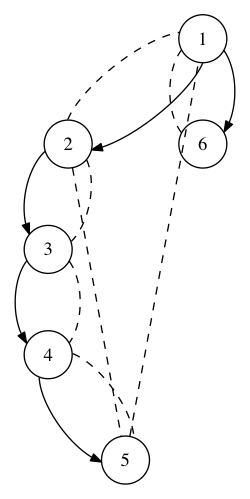

In [26]:
plotgraphtree(g, "cycle")

### Directed Graphs

The critical difference in the traversal comes from how we encoded the adjacency list: directed edges will be considered only once, when exploring the source vertex. 

### Edge Classification

For directed graphs, depth-first search labelings have many more possibilities:

From Skiena:

![](dirposs.png)

In [29]:
g = Graph(vclass=AnnotatedVertex, directed=True)
for i in range(1,7):
    g.addVertex(i)
g.addEdge(1,6)
g.addEdge(1,2)
g.addEdge(2,3)
g.addEdge(3,4)
g.addEdge(4,5)
g.addEdge(2,5)
g.addEdge(5,1)
print(list(g))

[AnnotatedVertex(1 -> [6, 2], time=(0, 0), parent=null), AnnotatedVertex(2 -> [3, 5], time=(0, 0), parent=null), AnnotatedVertex(3 -> [4], time=(0, 0), parent=null), AnnotatedVertex(4 -> [5], time=(0, 0), parent=null), AnnotatedVertex(5 -> [1], time=(0, 0), parent=null), AnnotatedVertex(6 -> [], time=(0, 0), parent=null)]


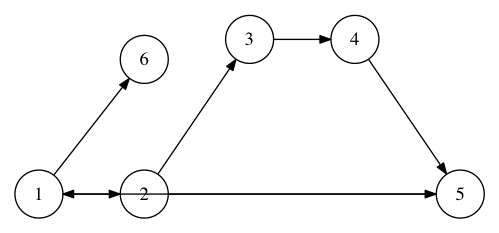

In [30]:
plotdgraph(g, "nearlyadag")

In [31]:
class EdgeClassifyingDFS(DepthFirstSearch):
    
    def pre_hook(self, v):
        #print("PRE", v.idee)
        pass
    
    def post_hook(self, v):
        #print("POST", v.idee)
        pass
    
    def edge_hook(self, f, t):
        print(f.idee, t.idee)
        if t.parent is f:
            r = "{} TREE {}".format(f.idee, t.idee)
            print(r)
            return r
        if t.discovered and not t.processed:
            r = "{} BACK {}".format(f.idee, t.idee)
            print(r)
            return r
        if t.processed and t.entry > f.entry:
            r = "{} FORWARD {}".format(f.idee, t.idee)
            print(r)
            return r
        if t.processed and t.entry < f.entry:
            r = "{} CROSS {}".format(f.idee, t.idee)
            print(r)
            return r
        print("BLA", )
        

In [32]:
dfsc=EdgeClassifyingDFS(g)
dfsc(g.getVertex(1))

1 6
1 TREE 6
1 2
1 TREE 2
2 3
2 TREE 3
3 4
3 TREE 4
4 5
4 TREE 5
5 1
5 BACK 1
2 5
2 FORWARD 5


In [33]:
list(g)

[AnnotatedVertex(1 -> [6, 2], time=(1, 12), parent=null),
 AnnotatedVertex(2 -> [3, 5], time=(4, 11), parent=1),
 AnnotatedVertex(3 -> [4], time=(5, 10), parent=2),
 AnnotatedVertex(4 -> [5], time=(6, 9), parent=3),
 AnnotatedVertex(5 -> [1], time=(7, 8), parent=4),
 AnnotatedVertex(6 -> [], time=(2, 3), parent=1)]

### DAGs

**A directed graph is a DAG if and only if no back edges are encountered.**

In [39]:
dag = Graph(vclass=AnnotatedVertex, directed=True)
for i in range(1,8):
    dag.addVertex(i)
dag.addEdge(1,6)
dag.addEdge(1,2)
dag.addEdge(2,3)
dag.addEdge(3,4)
dag.addEdge(4,5)
dag.addEdge(2,5)
print(list(dag))

[AnnotatedVertex(1 -> [6, 2], time=(0, 0), parent=null), AnnotatedVertex(2 -> [3, 5], time=(0, 0), parent=null), AnnotatedVertex(3 -> [4], time=(0, 0), parent=null), AnnotatedVertex(4 -> [5], time=(0, 0), parent=null), AnnotatedVertex(5 -> [], time=(0, 0), parent=null), AnnotatedVertex(6 -> [], time=(0, 0), parent=null), AnnotatedVertex(7 -> [], time=(0, 0), parent=null)]


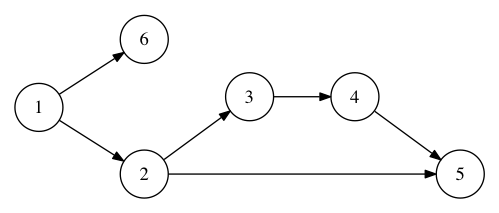

In [40]:
plotdgraph(dag,"dag1")

### Toposort or Linear Extension

From Skiena:
Topological sorting  is the most important operation on directed acyclic graphs (DAGs). It orders the vertices on a line such that all directed edges go from left to right. Such an ordering cannot exist if the graph contains a directed cycle, because there is no way you can keep going right on a line and still return back to where you started from!

Each DAG has at least one topological sort. The importance of topological sorting is that it gives us an ordering to process each vertex before any of its successors. Suppose the edges represented precedence constraints, such that edge (x, y) means job x must be done before job y. Then, any topological sort defines a legal schedule. Indeed, there can be many such orderings for a given DAG.

**Labeling the vertices in the reverse order that they are marked processed finds a topological sort of a DAG**. This means that if we order the vertices by DFS finishing time we get our linear extension



In [41]:
class ToposortDFS(DepthFirstSearch):
    
    def __init__(self, g):
        super().__init__(g)
        self.stack=[]
    
    def pre_hook(self, v):
        #print("PRE", v.idee)
        print('----entering----'+str(v.idee))
    
    def post_hook(self, v):
        print("POST", str(v.idee))
        self.stack.append(v)
    
    def edge_hook(self, f, t):
        print(f.idee, t.idee)
        if t.parent is f:
            r = "{} TREE {}".format(f.idee, t.idee)
            print(r)
            return r
        if t.discovered and not t.processed:
            r = "{} BACK {}".format(f.idee, t.idee)
            print("WARNING: NOT A DAG", r)
            return r
        if t.processed and t.entry > f.entry:
            r = "{} FORWARD {}".format(f.idee, t.idee)
            print(r)
            return r
        if t.processed and t.entry < f.entry:
            r = "{} CROSS {}".format(f.idee, t.idee)
            print(r)
            return r
        print("BLA" )
        

In [42]:
def toposort(g):
    dagdfs=ToposortDFS(g)
    for v in g:
        print("=========For {}".format(v.idee))
        if not (v.discovered or v.processed):
            print("dagging", v.idee)
            dagdfs(v)
    return dagdfs.stack

In [43]:
toposort(dag)

=========For 1
dagging 1
----entering----1
1 6
1 TREE 6
----entering----6
POST 6
1 2
1 TREE 2
----entering----2
2 3
2 TREE 3
----entering----3
3 4
3 TREE 4
----entering----4
4 5
4 TREE 5
----entering----5
POST 5
POST 4
POST 3
2 5
2 FORWARD 5
POST 2
POST 1
=========For 2
=========For 3
=========For 4
=========For 5
=========For 6
=========For 7
dagging 7
----entering----7
POST 7


[AnnotatedVertex(6 -> [], time=(2, 3), parent=1),
 AnnotatedVertex(5 -> [], time=(7, 8), parent=4),
 AnnotatedVertex(4 -> [5], time=(6, 9), parent=3),
 AnnotatedVertex(3 -> [4], time=(5, 10), parent=2),
 AnnotatedVertex(2 -> [3, 5], time=(4, 11), parent=1),
 AnnotatedVertex(1 -> [6, 2], time=(1, 12), parent=null),
 AnnotatedVertex(7 -> [], time=(13, 14), parent=null)]

In [114]:
list(dag)

[AnnotatedVertex(1 -> [6, 2], time=(1, 12), parent=null),
 AnnotatedVertex(2 -> [3, 5], time=(4, 11), parent=1),
 AnnotatedVertex(3 -> [4], time=(5, 10), parent=2),
 AnnotatedVertex(4 -> [5], time=(6, 9), parent=3),
 AnnotatedVertex(5 -> [], time=(7, 8), parent=4),
 AnnotatedVertex(6 -> [], time=(2, 3), parent=1)]

### A more involved graph

In [44]:
dag = Graph(vclass=AnnotatedVertex, directed=True)
for i in 'abcdefghijklm':
    dag.addVertex(i)
dag.addEdge('a','b')
dag.addEdge('a','c')
dag.addEdge('c','d')
dag.addEdge('c','e')
dag.addEdge('b','e')
dag.addEdge('d','f')
dag.addEdge('e','f')
dag.addEdge('f','j')
dag.addEdge('a','h')
dag.addEdge('a','i')
dag.addEdge('h','i')
dag.addEdge('i','j')
dag.addEdge('j','m')
dag.addEdge('g','k')
dag.addEdge('k','l')
dag.addEdge('g','m')





print(list(dag))

[AnnotatedVertex(f -> ['j'], time=(0, 0), parent=null), AnnotatedVertex(m -> [], time=(0, 0), parent=null), AnnotatedVertex(l -> [], time=(0, 0), parent=null), AnnotatedVertex(j -> ['m'], time=(0, 0), parent=null), AnnotatedVertex(e -> ['f'], time=(0, 0), parent=null), AnnotatedVertex(d -> ['f'], time=(0, 0), parent=null), AnnotatedVertex(i -> ['j'], time=(0, 0), parent=null), AnnotatedVertex(k -> ['l'], time=(0, 0), parent=null), AnnotatedVertex(c -> ['d', 'e'], time=(0, 0), parent=null), AnnotatedVertex(a -> ['b', 'c', 'h', 'i'], time=(0, 0), parent=null), AnnotatedVertex(h -> ['i'], time=(0, 0), parent=null), AnnotatedVertex(b -> ['e'], time=(0, 0), parent=null), AnnotatedVertex(g -> ['k', 'm'], time=(0, 0), parent=null)]


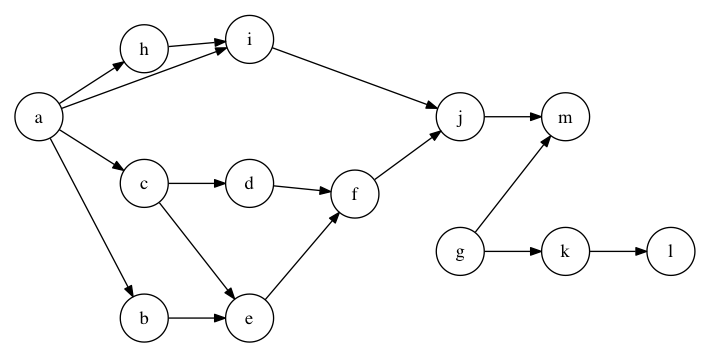

In [45]:
plotdgraph(dag, "dag2")

In [46]:
toposort(dag)

=========For f
dagging f
----entering----f
f j
f TREE j
----entering----j
j m
j TREE m
----entering----m
POST m
POST j
POST f
=========For m
=========For l
dagging l
----entering----l
POST l
=========For j
=========For e
dagging e
----entering----e
e f
e CROSS f
POST e
=========For d
dagging d
----entering----d
d f
d CROSS f
POST d
=========For i
dagging i
----entering----i
i j
i CROSS j
POST i
=========For k
dagging k
----entering----k
k l
k CROSS l
POST k
=========For c
dagging c
----entering----c
c d
c CROSS d
c e
c CROSS e
POST c
=========For a
dagging a
----entering----a
a b
a TREE b
----entering----b
b e
b CROSS e
POST b
a c
a CROSS c
a h
a TREE h
----entering----h
h i
h CROSS i
POST h
a i
a CROSS i
POST a
=========For h
=========For b
=========For g
dagging g
----entering----g
g k
g CROSS k
g m
g CROSS m
POST g


[AnnotatedVertex(m -> [], time=(3, 4), parent=j),
 AnnotatedVertex(j -> ['m'], time=(2, 5), parent=f),
 AnnotatedVertex(f -> ['j'], time=(1, 6), parent=null),
 AnnotatedVertex(l -> [], time=(7, 8), parent=null),
 AnnotatedVertex(e -> ['f'], time=(9, 10), parent=null),
 AnnotatedVertex(d -> ['f'], time=(11, 12), parent=null),
 AnnotatedVertex(i -> ['j'], time=(13, 14), parent=null),
 AnnotatedVertex(k -> ['l'], time=(15, 16), parent=null),
 AnnotatedVertex(c -> ['d', 'e'], time=(17, 18), parent=null),
 AnnotatedVertex(b -> ['e'], time=(20, 21), parent=a),
 AnnotatedVertex(h -> ['i'], time=(22, 23), parent=a),
 AnnotatedVertex(a -> ['b', 'c', 'h', 'i'], time=(19, 24), parent=null),
 AnnotatedVertex(g -> ['k', 'm'], time=(25, 26), parent=null)]